<a href="https://colab.research.google.com/github/InscribeDeeper/bert_utils/blob/master/analyst_question_topicmodeling_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import bertopic

In [4]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import gensim

In [6]:
gensim.__version__

'3.6.0'

In [10]:
# !pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan

In [7]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [8]:
!pip install -U scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 45.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [4]:
import sys, os

use_colab = True
if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    cur_path = os.path.join('/content/drive/MyDrive/temp')
    os.chdir(cur_path)
    
    # !pip install linearmodels
    # !pip install transformers

    # !pip install torchinfo
    
    #!pip install bertopic
    # !pip install --upgrade pip setuptools wheel
    # !pip install bertopic --no-cache-dir
    # !pip uninstall hdbscan -y
    # !pip install hdbscan --no-cache-dir --no-binary :all: --no-build-isolation
    # !pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan
    # 

else:
    cur_path = os.path.join('H:\\My Drive\\temp')
    os.chdir(cur_path)
    
    

Mounted at /content/drive


In [3]:
# !pip install --upgrade gensim

In [4]:
# !pip uninstall numpy
# !pip install numpy==1.20.0 --no-cache-dir

In [5]:

    
import random, pickle
import numpy as np
from torch.nn import BCEWithLogitsLoss, BCELoss
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support
import tensorflow as tf
import torch
import pandas as pd

from transformers import AutoConfig, AutoModel, AutoTokenizer, AutoModelForSequenceClassification

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# from torchinfo import summary
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer

import copy
from sklearn.utils import shuffle
import glob

import time
import datetime
from sklearn.decomposition import PCA


# from gensim.models.coherencemodel import CoherenceModel

    
#from bertopic import BERTopic

# from octis.evaluation_metrics.topic_significance_metrics import KL_uniform
# from octis.evaluation_metrics.diversity_metrics import KLDivergence

In [6]:
from bertopic import BERTopic

In [8]:
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora


In [9]:
!pip install octis
from octis.evaluation_metrics.topic_significance_metrics import KL_uniform
from octis.evaluation_metrics.diversity_metrics import KLDivergence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp38-cp38-linux_x86_64.whl size=233363 sha256=a2e92a6193c404e4ac6d7ae6a74fab71b146dfd309ce155d56f3d88b41b3ba30
  Stored in directory: /root/.cache/pip/wheels/41/00/e7/b328c0f5e4bbb9ac8ba5a72e56b1749be63dc1ab1c9321fd4e
  Created wheel for fs

In [10]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Sun Jan  8 01:57:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    device_name ="/cpu:0"
    print('GPU device not found')
    #raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [12]:
# If there's a GPU available...
if torch.cuda.is_available(): 

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [13]:
# set seed
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# load data

In [ ]:
# # # Load the dataset into a pandas dataframe.
# pred = pd.read_csv("./predict_skp_fin.csv", encoding="ISO-8859-1")

# # # Report the number of sentences.
# print('Number of training sentences: {:,}\n'.format(pred.shape[0]))
# # pred = pred.rename(columns={'encoded_unique_ticker_ts':'text', 'rid':'encoded_unique_ticker_ts',\
# #                             'text':'rid'})
# pred.encoded_unique_ticker_ts = pred.encoded_unique_ticker_ts.astype(str)
# pred.encoded_unique_ticker_ts = pred.encoded_unique_ticker_ts.apply(lambda x: float(x) if 'new' not in x else x)
# pred.encoded_unique_ticker_ts = pred.encoded_unique_ticker_ts.astype(str)
# pred.sample(10)

# df = pd.read_csv("./reg_data_20220912.csv")
# df.encoded_unique_ticker_ts = df.encoded_unique_ticker_ts.astype(str)
# df.head()
# #keep the target firms
# #pred_1 is the data we will use in the further steps
# pred_1 = pd.merge(pred, df[['encoded_unique_ticker_ts']], on=['encoded_unique_ticker_ts'])
# print(pred_1.shape, pred.shape, df.shape)
# print(len(set(pred_1.encoded_unique_ticker_ts)), len(set(pred.encoded_unique_ticker_ts)), len(set(df.encoded_unique_ticker_ts)))
# pred_1.head()
# def count_wrd_in_text(sentence):
#     import string 
#     sentence = sentence.lower()
    
#     tokens = sentence.split(' ')
#     #print(tokens)
#     cleaned_tokens = []
#     for t in tokens:
#         t = t.strip("")
#         while len(t)>0:
#             #print(t)
#             if (len(t)>0) and (t[0] in string.punctuation):
#                 t = t[1:]
#             if (len(t)>0) and (t[-1] in string.punctuation):
#                 t = t[0:len(t)-1]
#             if len(t)<= 0:
#                 break
#             if (len(t)>0) and not ((t[0] in string.punctuation) or (t[-1] in string.punctuation)) :
#                 break
#         if len(t)>0:
#             cleaned_tokens.append(t)
#     return len(cleaned_tokens)
# a = pred_1.text.sample()
# print(a.values[0])
# count_wrd_in_text(a.values[0])
# pred_1['num_word'] = pred_1.text.apply(lambda x: count_wrd_in_text(x))
# pred_1[['num_word','predict']].describe().round(2)
# pred_1.to_csv('./predict_all_fortopicmodeling.csv',index=False)

In [ ]:
pred_1 = pd.read_csv('./predict_all_fortopicmodeling.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Topic Modeling
reference:https://www.heywhale.com/mw/project/5fa7583d49c6d70030eec3f5
         https://github.com/MaartenGr/BERTopic



## test

In [ ]:
pred_2 = pred_1[(pred_1.predict > 0.7) & (pred_1.num_word > 12) ] 

pred_2 = pred_2.sample(5000)

pred_2 = pred_2.reset_index()
# pred_1.predict.mean()

In [ ]:
print(pred_1.shape, pred_2.shape)

(3104509, 5) (5000, 6)


In [ ]:
pred_2.isnull().sum()

index                       0
text                        0
encoded_unique_ticker_ts    0
rid                         0
predict                     0
num_word                    0
dtype: int64

In [ ]:
pred_2.head()

,index,text,encoded_unique_ticker_ts,rid,predict,num_word
0,2927,I assume that it takes you about 90 days to pu...,new510,12,0.776405,16
1,2641977,You just mentioned your commentary about the b...,45859.0,1158490,0.965144,17
2,1603924,"One, I wanted to find out if we should be thin...",85388.0,679566,0.998480,37
3,2030397,It's been a while since you've seen a dividend...,54118.0,879295,0.993756,13
4,1967027,"Kevin, in your prepared marks, it seemed like ...",72312.0,848244,0.725627,32


In [ ]:
#process the text


In [ ]:
# reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
# pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html

vectorizer_model = CountVectorizer(stop_words="english")

#parameter need to thiank about:
#top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics=16, calculate_probabilities=True) 
topics, probs = topic_model.fit_transform(pred_2.text)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2022-11-07 05:04:02,201 - BERTopic - Transformed documents to Embeddings
2022-11-07 05:04:10,231 - BERTopic - Reduced dimensionality
2022-11-07 05:04:11,457 - BERTopic - Clustered reduced embeddings
2022-11-07 05:04:12,403 - BERTopic - Reduced number of topics from 69 to 17


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3537,-1_just_quarter_year_like
1,0,268,0_margin_gross_margins_points
2,1,168,1_million_quarter_expense_expenses
3,2,134,2_q2_4q_q1_q4
4,3,100,3_fda_patients_data_drug
5,4,99,4_growth_rate_year_just
6,5,79,5_acquisition_deal_contract_just
7,6,76,6_pricing_price_prices_just
8,7,76,7_guys_think_just_like
9,8,70,8_tax_rate_pretax_taxes


In [ ]:
for t in range(0,16):
    print('******* ', t)
    for i in topic_model.get_topic(t):
        print(i)

*******  0
('margin', 0.14657211420597163)
('gross', 0.10175999995534497)
('margins', 0.09680128968015578)
('points', 0.038120564102474684)
('basis', 0.03646592514493677)
('mix', 0.02869897949363028)
('little', 0.02604681563831537)
('bit', 0.02600291966295938)
('quarter', 0.025780811041270234)
('operating', 0.022141921339334708)
*******  1
('million', 0.14639323117414033)
('quarter', 0.051997102283906325)
('expense', 0.04730622386696576)
('expenses', 0.037884322900638194)
('budget', 0.031028929019595825)
('think', 0.02918008584950676)
('billion', 0.02908702496851394)
('just', 0.028652983111530996)
('like', 0.027669463109990234)
('year', 0.025642098515767323)
*******  2
('q2', 0.09471227089348212)
('4q', 0.06632614073104856)
('q1', 0.06552615882694293)
('q4', 0.06346557550169142)
('q3', 0.05889724619187484)
('2q', 0.0564568287523415)
('3q', 0.05376840833556334)
('1q', 0.029306155427698776)
('year', 0.02732259908038187)
('little', 0.02720717673468486)
*******  3
('fda', 0.082541880491601

In [ ]:
topic_model.representative_docs_

{1: ['You have another quarter of heavy up spend, or are you through that at this point?',
  'Clearly, sales were lighter, to your earlier point, which may just be the answer, but can you talk to the de-leverage on the expense line this quarter?',
  "As I think about that number, and what's imbedded in there for Gorgon and Wheatstone and CPChem, et cetera, it seems like it's $2 billion if not $3 billion of spend for some projects that'll be rolling off."],
 7: ['Might it be a little shorter than what you guys have been doing previously?',
  "I'm just trying to think, does that pressure you guys to do something sooner rather than later if that's on the table?",
  'I think you have all done a great job being disciplined at around 7x, trailing 12 months.'],
 3: ["And then on VIMIZIM, I know you're not providing any update any more on the size of the registry of the number of identified patients so what I was hoping as you might be able to give some color around maybe the geographic distri

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[1])

In [ ]:
topic_model.visualize_hierarchy()

## top 25% v.s. bottom 25%

In [ ]:
pred_1[['num_word','predict']].describe().round(2)

,num_word,predict
count,3104509.00,3104509.00
mean,15.63,0.27
std,14.92,0.36
min,0.00,0.00
25%,3.00,0.00
50%,12.00,0.07
75%,23.00,0.46
max,329.00,1.00


In [ ]:
pred_1.predict.quantile([.10, .5, .90])

0.1    0.000017
0.5    0.071403
0.9    0.981193
Name: predict, dtype: float64

In [ ]:
pred_1[pred_1.predict > pred_1.predict.quantile([.10, .5, .90])[0.90]][['num_word','predict']].describe()

,num_word,predict
count,310439.000000,310439.000000
mean,22.753646,0.996565
std,15.244583,0.004858
min,1.000000,0.981194
25%,12.000000,0.994859
50%,19.000000,0.999152
75%,30.000000,0.999942
max,329.000000,1.000000


In [ ]:
pred_top = pred_1[(pred_1.predict > pred_1.predict.quantile([.10, .5, .90])[0.90]) ] 

#pred_2 = pred_2.sample(5000)

pred_top = pred_top.reset_index()
# pred_1.predict.mean()

In [ ]:
print(pred_1.shape, pred_top.shape)

(3104509, 5) (108913, 6)


In [ ]:
pred_top.isnull().sum()

index                       0
text                        0
encoded_unique_ticker_ts    0
rid                         0
predict                     0
num_word                    0
dtype: int64

In [ ]:
pred_top.head()

,index,text,encoded_unique_ticker_ts,rid,predict,num_word
0,74,But in terms of what I'll say is core developm...,new248,8,0.915030,36
1,101,"And you're also suggesting that, again, if a c...",new248,16,0.985978,59
2,129,I know it's small versus today's news but coul...,new248,23,0.976610,50
3,246,There seems to be a -- particularly with the O...,new217,17,0.998906,38
4,252,Or is the whole issue of really being security...,new217,18,0.999990,32


In [ ]:
# reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
# pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html

vectorizer_model = CountVectorizer(stop_words="english",min_df=0)


#dim_model = PCA(n_components=12)

#parameter need to thiank about:
#top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
#umap_model = dim_model
topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics='auto', calculate_probabilities=False) 
topics, probs = topic_model.fit_transform(pred_top.text)

NameError: ignored

In [ ]:
# Save model
topic_model_bot.save("./bert_model/topic_model_allrange")	

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
topic_model.reduce_topics(pred_top.text, nr_topics=10)

2022-11-08 02:54:46,847 - BERTopic - Reduced number of topics from 21 to 11


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,87751,-1_just_quarter_think_like
1,0,6178,0_margin_gross_margins_quarter
2,1,3118,1_growth_organic_year_loan
3,2,2545,2_q4_q1_q3_q2
4,3,1836,3_ebitda_ebit_million_margin
5,4,1409,4_stock_share_buyback_shares
6,5,1355,5_4q_2q_3q_1q
7,6,1302,6_eps_guidance_range_just
8,7,1159,7_revenue_quarter_revenues_growth
9,8,1141,8_rent_lease_occupancy_noi


In [ ]:
for t in range(0,11):
    print('******* ', t)
    for i in topic_model.get_topic(t):
        print(i)

*******  0
('margin', 0.12945835617505233)
('gross', 0.08992310232486032)
('margins', 0.08726410760194028)
('quarter', 0.04171073429226611)
('basis', 0.03486385617710392)
('just', 0.033632188522714185)
('year', 0.033441778502348224)
('points', 0.030916276015245322)
('like', 0.026216348688460678)
('operating', 0.025830033869493334)
*******  1
('growth', 0.13027237469687242)
('organic', 0.08265377145506672)
('year', 0.04084275789725727)
('loan', 0.03968638051719482)
('just', 0.03930090075339345)
('quarter', 0.03340195250058994)
('rate', 0.03146779322229061)
('think', 0.02955035523873823)
('kind', 0.028538134440011617)
('like', 0.028057017464043512)
*******  2
('q4', 0.12465083838482523)
('q1', 0.08800881386789255)
('q3', 0.08418831790400438)
('q2', 0.07484557252296366)
('year', 0.03916519586893893)
('just', 0.03662267050126879)
('like', 0.03054670904356633)
('guidance', 0.030462301706846016)
('think', 0.026336631249011616)
('revenue', 0.025117707973197748)
*******  3
('ebitda', 0.2041059

TypeError: ignored

In [ ]:
pred_bot = pred_1[(pred_1.predict < pred_1.predict.quantile([.15, .5, .85])[0.15]) & (pred_1.num_word > 30) ] 

#pred_2 = pred_2.sample(5000)

pred_bot = pred_bot.reset_index()

print(pred_1.shape, pred_top.shape)

(3104509, 5) (108913, 6)


In [ ]:
# reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
# pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html

vectorizer_model = CountVectorizer(stop_words="english",min_df=0)


#dim_model = PCA(n_components=12)

#parameter need to think about:
#top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
#umap_model = dim_model
topic_model_bot = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics=60, calculate_probabilities=False) 
topics_bot, probs_bot = topic_model_bot.fit_transform(pred_bot.text)



Batches:   0%|          | 0/3350 [00:00<?, ?it/s]

2022-11-08 02:58:33,396 - BERTopic - Transformed documents to Embeddings
2022-11-08 03:00:02,506 - BERTopic - Reduced dimensionality
2022-11-08 03:00:10,567 - BERTopic - Clustered reduced embeddings
2022-11-08 03:00:31,600 - BERTopic - Reduced number of topics from 637 to 61


In [ ]:
topic_model_bot.save("./bert_model/topic_model_bot25")	

In [ ]:
topic_model_bot = BERTopic.load("./bert_model/topic_model_bot25")

In [ ]:
topic_model_bot.reduce_topics(pred_bot.text, nr_topics=10)

2022-11-08 03:13:08,499 - BERTopic - Reduced number of topics from 61 to 11


In [ ]:
topic_model_bot.get_topic_info()

,Topic,Count,Name
0,-1,90646,-1_just_think_kind_maybe
1,0,3173,0_margin_margins_gross_think
2,1,2930,1_color_little_just_provide
3,2,2159,2_million_cost_opex_sga
4,3,1666,3_lease_leasing_leases_rent
5,4,1357,4_acquisitions_acquisition_just_looking
6,5,1246,5_pricing_price_just_think
7,6,1244,6_capex_million_year_just
8,7,1065,7_pipeline_just_pipe_deals
9,8,866,8_aircraft_aerospace_just_maybe


In [ ]:
probs_bot.shape

(107177,)

In [ ]:
len(topics_bot)

107177

In [ ]:
topic_model_bot.get_params()

{'calculate_probabilities': False,
 'ctfidf_model': ClassTfidfTransformer(),
 'diversity': None,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f225d04e090>,
 'hdbscan_model': HDBSCAN(min_cluster_size=10, prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': 60,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(min_df=0, stop_words='english'),
 'verbose': True}

In [ ]:
topic_model_bot = BERTopic.load("./bert_model/topic_model_bot25")
topic_model = BERTopic.load("./bert_model/topic_model_top25")

In [ ]:
topic_model_bot.reduce_topics(pred_bot.text, nr_topics=10)
topic_model.reduce_topics(pred_top.text, nr_topics=10)

2022-11-08 03:19:27,358 - BERTopic - Reduced number of topics from 61 to 11


2022-11-08 03:19:32,972 - BERTopic - Reduced number of topics from 61 to 11


In [ ]:
topic_model.visualize_barchart(top_n_topics=5,n_words=10,height=500)

In [ ]:
topic_model_bot.visualize_barchart(top_n_topics=5,n_words=10,height=500)

## use all data with package

In [ ]:
# ranges = pred_1.predict.quantile([0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1])
# ranges[1.0] = ranges[1.0] + 1e-6
# ranges
# ranges.index
# #rondomely select the data from each range
# sel_df = pd.DataFrame([])
# for r in ranges.rolling(2):
#     print(r)
#     range = r.values
#     print('\n')

#     if range.shape[0] > 1:
#         s = range[0]
#         e = range[1]

#         sub_data = pred_1[(pred_1.predict >= s) & (pred_1.predict < e)]
#         sub_data = sub_data.sample(10000)
#         sel_df = pd.concat([sub_data, sel_df])


# sel_df.head()
# sel_df.tail()
# sel_df.shape
# sel_df[['predict']].describe().round(2)
# sel_df.to_csv('./allrange_sel_data_fortopicmodeling.csv',index=False)

In [ ]:
sel_df = pd.read_csv('./allrange_sel_data_fortopicmodeling.csv')

In [ ]:
sel_df.head()

,text,encoded_unique_ticker_ts,rid,predict,num_word
0,"You mentioned, Bill, in your prepared remarks ...",75472.0,320310,0.999976,41
1,"Yes, the net loss that was -- I'm sorry, net l...",84147.0,450537,0.927659,28
2,It's a much different environment than what we...,66881.0,214175,0.999974,13
3,It sounds like the second cohort of the PROGRE...,41942.0,614072,0.707056,32
4,"Doug, given that 2017 activity and your new co...",17515.0,1289830,0.986131,49


In [ ]:
sel_df.tail()

,text,encoded_unique_ticker_ts,rid,predict,num_word
99995,Can you just give us an update on how that pot...,31602.0,175761,6.430042e-06,19
99996,"And separate question, do you have any other a...",79520.0,912244,1.245275e-06,20
99997,VJ you'd said during the Q&A that some of the ...,108.0,1354128,9.916058e-06,18
99998,Just any additional color you can provide ther...,83335.0,860433,4.105985e-06,19
99999,Or could you go beyond that to look at some ot...,57994.0,52934,4.245112e-07,17


In [ ]:
sel_df.shape

(100000, 5)

In [ ]:
# reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
# pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html
sel_df = sel_df.reset_index(drop=True)
vectorizer_model = CountVectorizer(stop_words="english",min_df=3)


#parameter need to think about:
#top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
#umap_model = dim_model
topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics=60, calculate_probabilities=False) 
topics, probs = topic_model.fit_transform(sel_df.text)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-28 19:26:41,827 - BERTopic - Transformed documents to Embeddings
2022-12-28 19:30:11,372 - BERTopic - Reduced dimensionality
2022-12-28 19:30:19,898 - BERTopic - Clustered reduced embeddings
2022-12-28 19:30:40,813 - BERTopic - Reduced number of topics from 994 to 61


In [ ]:
topic_model.save("./bert_model/topic_model_allrange")

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,50172,-1_just_think_kind_year
1,0,4221,0_okay_comfortable_ok_comfort
2,1,2319,1_margin_margins_gross_points
3,2,1947,2_hi_hello_guys_thanks
4,3,1766,3_patients_study_trial_phase
...,...,...,...
56,55,383,55_yeah_absolutely_lastly_yes
57,56,376,56_tax_rate_taxes_reform
58,57,356,57_customers_customer_relationship_discussions
59,58,353,58_number_numbers_cannibalization_im


#### test:coherence

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora

- for test

In [ ]:
documents = pd.DataFrame({"Document": sel_df.text,
                          "ID": range(len(sel_df.text)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

In [ ]:
documents

,Document,ID,Topic
0,"You mentioned, Bill, in your prepared remarks ...",0,-1
1,"Yes, the net loss that was -- I'm sorry, net l...",1,-1
2,It's a much different environment than what we...,2,-1
3,It sounds like the second cohort of the PROGRE...,3,3
4,"Doug, given that 2017 activity and your new co...",4,-1
...,...,...,...
99995,Can you just give us an update on how that pot...,99995,43
99996,"And separate question, do you have any other a...",99996,-1
99997,VJ you'd said during the Q&A that some of the ...,99997,-1
99998,Just any additional color you can provide ther...,99998,8


In [ ]:
a = documents.Topic.value_counts().to_frame().reset_index(drop=False)
a = a.rename(columns={'index':'topic', 'Topic':'count'})

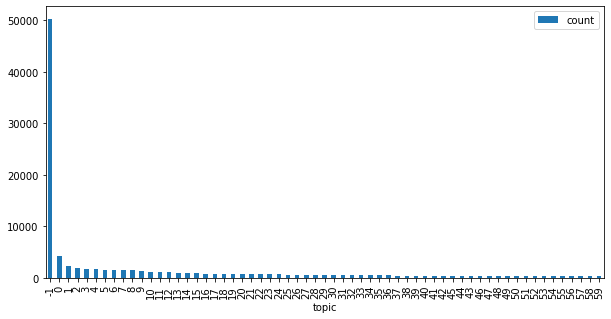

In [ ]:
a.plot.bar(x='topic', y='count',figsize=(10,5))

In [ ]:
sel_df

,text,encoded_unique_ticker_ts,rid,predict,num_word
0,"You mentioned, Bill, in your prepared remarks ...",75472.0,320310,9.999762e-01,41
1,"Yes, the net loss that was -- I'm sorry, net l...",84147.0,450537,9.276588e-01,28
2,It's a much different environment than what we...,66881.0,214175,9.999744e-01,13
3,It sounds like the second cohort of the PROGRE...,41942.0,614072,7.070558e-01,32
4,"Doug, given that 2017 activity and your new co...",17515.0,1289830,9.861306e-01,49
...,...,...,...,...,...
99995,Can you just give us an update on how that pot...,31602.0,175761,6.430042e-06,19
99996,"And separate question, do you have any other a...",79520.0,912244,1.245275e-06,20
99997,VJ you'd said during the Q&A that some of the ...,108.0,1354128,9.916058e-06,18
99998,Just any additional color you can provide ther...,83335.0,860433,4.105985e-06,19


In [ ]:
sel_df_1 = pd.merge(sel_df[['encoded_unique_ticker_ts','rid','predict','num_word']], documents, left_index=True, right_index=True)

In [ ]:
sel_df_1

,encoded_unique_ticker_ts,rid,predict,num_word,Document,ID,Topic
0,75472.0,320310,9.999762e-01,41,"You mentioned, Bill, in your prepared remarks ...",0,-1
1,84147.0,450537,9.276588e-01,28,"Yes, the net loss that was -- I'm sorry, net l...",1,-1
2,66881.0,214175,9.999744e-01,13,It's a much different environment than what we...,2,-1
3,41942.0,614072,7.070558e-01,32,It sounds like the second cohort of the PROGRE...,3,3
4,17515.0,1289830,9.861306e-01,49,"Doug, given that 2017 activity and your new co...",4,-1
...,...,...,...,...,...,...,...
99995,31602.0,175761,6.430042e-06,19,Can you just give us an update on how that pot...,99995,43
99996,79520.0,912244,1.245275e-06,20,"And separate question, do you have any other a...",99996,-1
99997,108.0,1354128,9.916058e-06,18,VJ you'd said during the Q&A that some of the ...,99997,-1
99998,83335.0,860433,4.105985e-06,19,Just any additional color you can provide ther...,99998,8


In [ ]:
# Preprocess documents
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

In [ ]:
# Extract vectorizer and tokenizer from BERTopic
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()
analyzer = vectorizer.build_analyzer()

In [ ]:
vectorizer

CountVectorizer(min_df=3, stop_words='english')

In [ ]:
tokenizer

<function Pattern.findall(string, pos=0, endpos=9223372036854775807)>

In [ ]:
# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
               for topic in range(len(set(topics))-1)]

In [ ]:
topic_words

[['okay',
  'comfortable',
  'ok',
  'comfort',
  'feel',
  'anda',
  'favoring',
  'sellin',
  'cushion',
  'sir'],
 ['margin',
  'margins',
  'gross',
  'points',
  'basis',
  'operating',
  'improvement',
  'quarter',
  'expansion',
  'think']]

In [ ]:
any('anda' in t for t in tokens)

False

In [ ]:
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()


In [ ]:
coherence

0.5757285304307351

- wrap up

In [ ]:
def calculate_coherence(n_topc, input_table=sel_df, model=None):
    # reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
    # pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html
    sel_df = input_table.reset_index(drop=True)
    vectorizer_model = CountVectorizer(stop_words="english",min_df=3)

    if model == None:
        #parameter need to think about:
        #top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
        #umap_model = dim_model
        topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics= n_topc, calculate_probabilities=False) 
        topics, probs = topic_model.fit_transform(sel_df.text)

        topic_model.save("./bert_model/topic_model_allrange"+str(n_topc))
    else:
        topic_model = BERTopic.load("./bert_model/topic_model_allrange"+str(n_topc))

    documents = pd.DataFrame({"Document": sel_df.text,
                          "ID": range(len(sel_df.text)),
                          "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

    a = documents.Topic.value_counts().to_frame().reset_index(drop=False)
    a = a.rename(columns={'index':'topic', 'Topic':'count'})
    display(a[a.topic != -1].plot.bar(x='topic', y='count', figsize=(10,5)))

    sel_df_1 = pd.merge(sel_df[['encoded_unique_ticker_ts','rid','predict','num_word']],\
                        documents, left_index=True, right_index=True)
    
    # Preprocess documents
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)


    # Extract vectorizer and tokenizer from BERTopic
    vectorizer = topic_model.vectorizer_model
    tokenizer = vectorizer.build_tokenizer()
    analyzer = vectorizer.build_analyzer()


    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
                for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
    coherence = coherence_model.get_coherence()

    return coherence, sel_df_1


In [ ]:
range(len(set(topics))-1)

range(0, 60)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:25:48,919 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:28:43,816 - BERTopic - Reduced dimensionality
2022-12-29 04:28:52,831 - BERTopic - Clustered reduced embeddings
2022-12-29 04:29:15,241 - BERTopic - Reduced number of topics from 1026 to 21
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:30:15,672 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:33:58,254 - BERTopic - Reduced dimensionality
2022-12-29 04:34:06,915 - BERTopic - Clustered reduced embeddings
2022-12-29 04:34:29,323 - BERTopic - Reduced number of topics from 1031 to 26
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:35:32,211 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:38:20,343 - BERTopic - Reduced dimensionality
2022-12-29 04:38:28,054 - BERTopic - Clustered reduced embeddings
2022-12-29 04:38:49,580 - BERTopic - Reduced number of topics from 989 to 31
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:39:59,511 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:44:34,930 - BERTopic - Reduced dimensionality
2022-12-29 04:44:43,951 - BERTopic - Clustered reduced embeddings
2022-12-29 04:45:05,657 - BERTopic - Reduced number of topics from 992 to 36
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:46:15,255 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:50:03,697 - BERTopic - Reduced dimensionality
2022-12-29 04:50:12,942 - BERTopic - Clustered reduced embeddings
2022-12-29 04:50:34,902 - BERTopic - Reduced number of topics from 1003 to 41
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:51:52,707 - BERTopic - Transformed documents to Embeddings
2022-12-29 04:54:59,525 - BERTopic - Reduced dimensionality
2022-12-29 04:55:07,262 - BERTopic - Clustered reduced embeddings
2022-12-29 04:55:30,062 - BERTopic - Reduced number of topics from 1004 to 46
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 04:56:54,330 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:01:19,766 - BERTopic - Reduced dimensionality
2022-12-29 05:01:28,835 - BERTopic - Clustered reduced embeddings
2022-12-29 05:01:51,428 - BERTopic - Reduced number of topics from 985 to 51
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:03:21,673 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:08:35,660 - BERTopic - Reduced dimensionality
2022-12-29 05:08:44,512 - BERTopic - Clustered reduced embeddings
2022-12-29 05:09:07,136 - BERTopic - Reduced number of topics from 1011 to 56
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:10:40,531 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:13:48,209 - BERTopic - Reduced dimensionality
2022-12-29 05:13:57,009 - BERTopic - Clustered reduced embeddings
2022-12-29 05:14:19,545 - BERTopic - Reduced number of topics from 1014 to 61
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:16:01,155 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:19:01,840 - BERTopic - Reduced dimensionality
2022-12-29 05:19:11,099 - BERTopic - Clustered reduced embeddings
2022-12-29 05:19:34,636 - BERTopic - Reduced number of topics from 1030 to 66
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:21:21,225 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:24:12,524 - BERTopic - Reduced dimensionality
2022-12-29 05:24:22,476 - BERTopic - Clustered reduced embeddings
2022-12-29 05:24:44,934 - BERTopic - Reduced number of topics from 1014 to 71
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:26:36,402 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:31:20,142 - BERTopic - Reduced dimensionality
2022-12-29 05:31:29,145 - BERTopic - Clustered reduced embeddings
2022-12-29 05:31:50,592 - BERTopic - Reduced number of topics from 1001 to 76
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


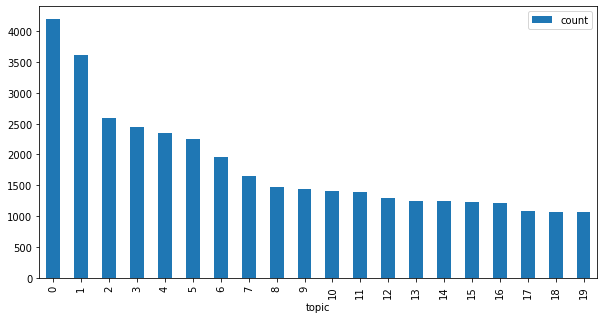

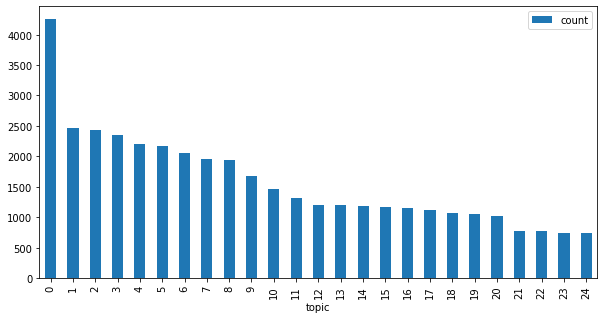

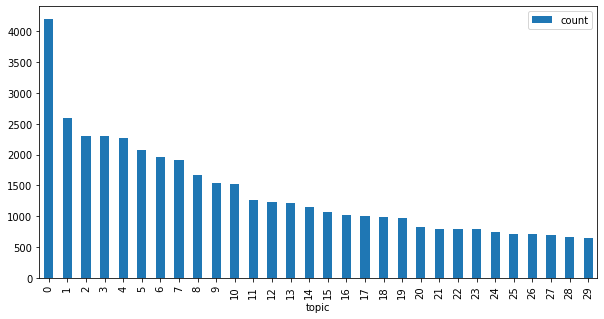

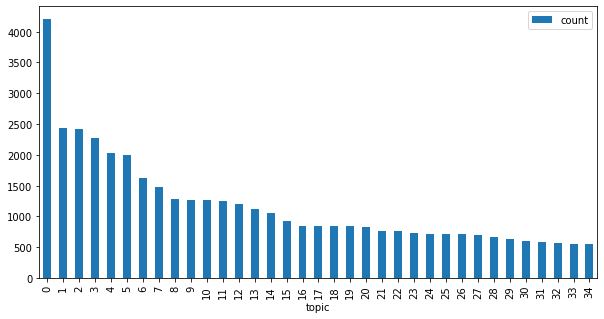

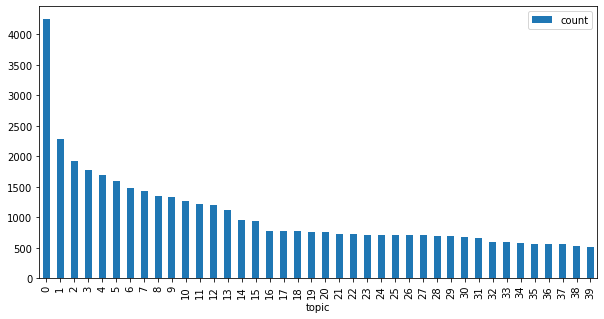

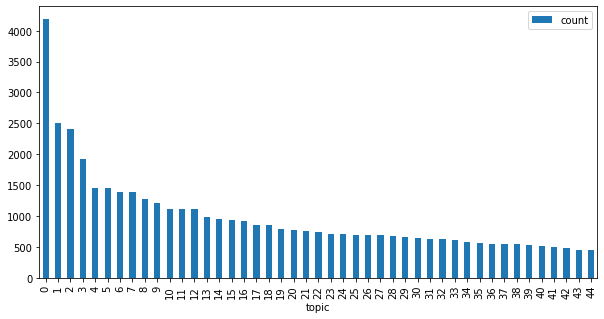

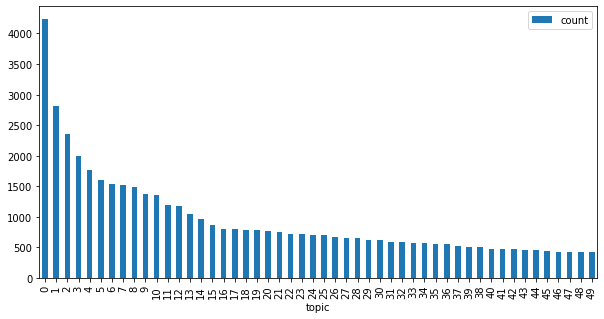

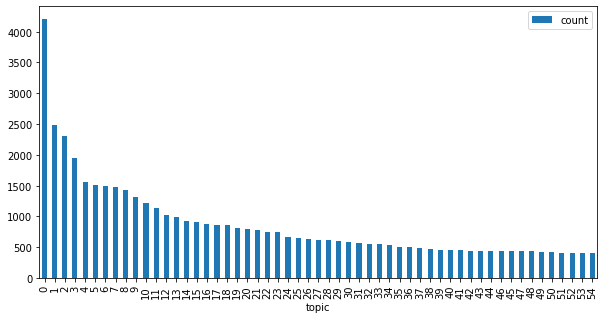

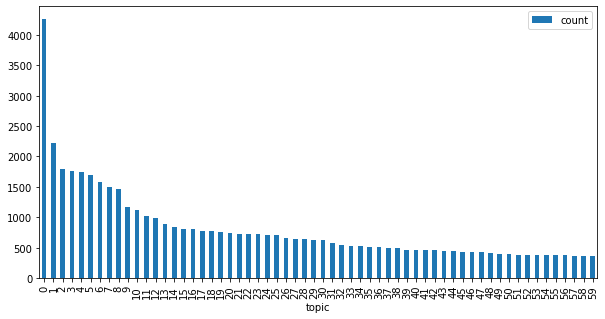

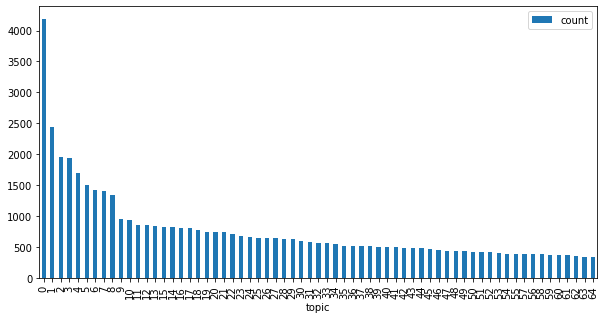

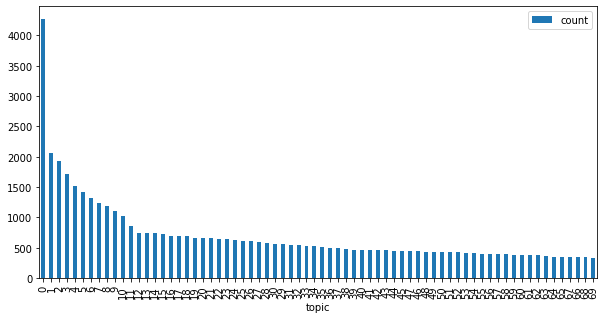

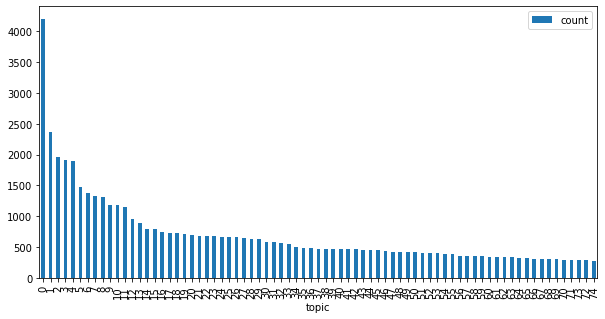

In [ ]:
#select the best n
coherence_list = []

for n_topc in range(20,80,5):
    coh, _ = calculate_coherence(n_topc, input_table=sel_df, model=None)
    coherence_list.append((n_topc, coh))


In [ ]:
coherence_list

[(20, 0.5423380933081504),
 (25, 0.5271109128768133),
 (30, 0.5467691614753398),
 (35, 0.5360057826486262),
 (40, 0.5521916805204672),
 (45, 0.5370165399261683),
 (50, 0.5555641082072684),
 (55, 0.5517071837086611),
 (60, 0.554359152179552),
 (65, 0.5688484709102042),
 (70, 0.5458749394518598),
 (75, 0.5391613186591947)]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:55:22,026 - BERTopic - Transformed documents to Embeddings
2022-12-29 05:57:43,503 - BERTopic - Reduced dimensionality
2022-12-29 05:57:53,120 - BERTopic - Clustered reduced embeddings
2022-12-29 05:58:15,320 - BERTopic - Reduced number of topics from 1022 to 61
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 05:59:54,692 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:02:47,810 - BERTopic - Reduced dimensionality
2022-12-29 06:02:56,495 - BERTopic - Clustered reduced embeddings
2022-12-29 06:03:18,351 - BERTopic - Reduced number of topics from 1015 to 62
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:04:58,596 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:07:50,728 - BERTopic - Reduced dimensionality
2022-12-29 06:07:59,574 - BERTopic - Clustered reduced embeddings
2022-12-29 06:08:21,910 - BERTopic - Reduced number of topics from 994 to 63
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:10:05,962 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:14:30,021 - BERTopic - Reduced dimensionality
2022-12-29 06:14:39,262 - BERTopic - Clustered reduced embeddings
2022-12-29 06:15:03,027 - BERTopic - Reduced number of topics from 1037 to 64
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:16:45,975 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:20:11,293 - BERTopic - Reduced dimensionality
2022-12-29 06:20:20,153 - BERTopic - Clustered reduced embeddings
2022-12-29 06:20:42,925 - BERTopic - Reduced number of topics from 992 to 65
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:22:34,825 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:26:42,988 - BERTopic - Reduced dimensionality
2022-12-29 06:26:52,116 - BERTopic - Clustered reduced embeddings
2022-12-29 06:27:15,474 - BERTopic - Reduced number of topics from 992 to 66
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:28:56,614 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:31:32,007 - BERTopic - Reduced dimensionality
2022-12-29 06:31:39,708 - BERTopic - Clustered reduced embeddings
2022-12-29 06:32:01,455 - BERTopic - Reduced number of topics from 999 to 67
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:33:45,760 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:36:18,954 - BERTopic - Reduced dimensionality
2022-12-29 06:36:26,707 - BERTopic - Clustered reduced embeddings
2022-12-29 06:36:48,412 - BERTopic - Reduced number of topics from 1000 to 68
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:38:42,748 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:42:35,248 - BERTopic - Reduced dimensionality
2022-12-29 06:42:44,110 - BERTopic - Clustered reduced embeddings
2022-12-29 06:43:06,772 - BERTopic - Reduced number of topics from 1022 to 69
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-12-29 06:44:48,514 - BERTopic - Transformed documents to Embeddings
2022-12-29 06:51:08,586 - BERTopic - Reduced dimensionality
2022-12-29 06:51:17,487 - BERTopic - Clustered reduced embeddings
2022-12-29 06:51:39,525 - BERTopic - Reduced number of topics from 1011 to 70
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


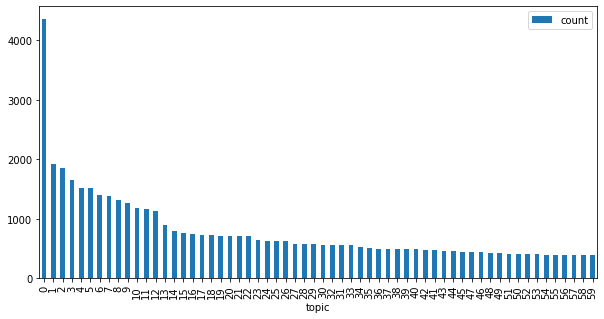

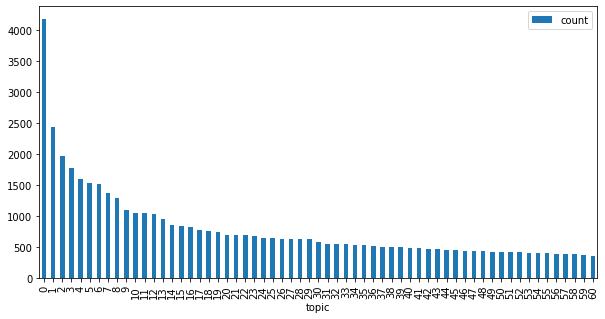

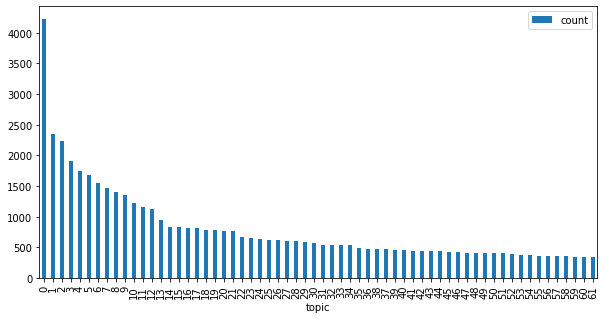

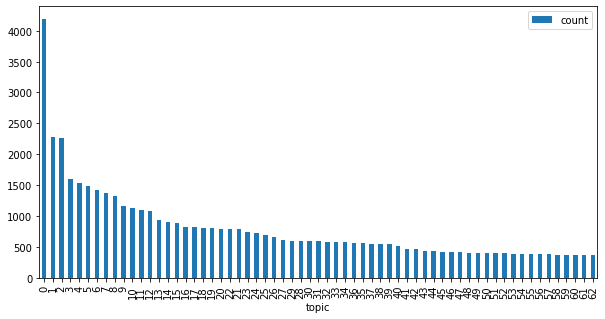

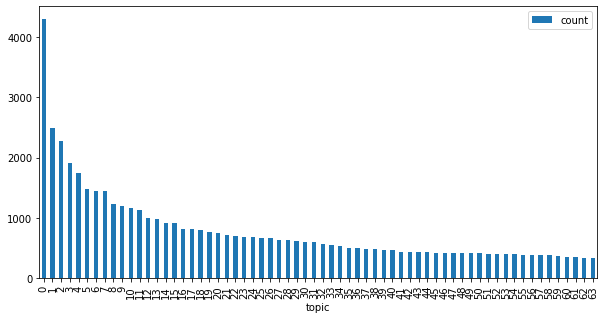

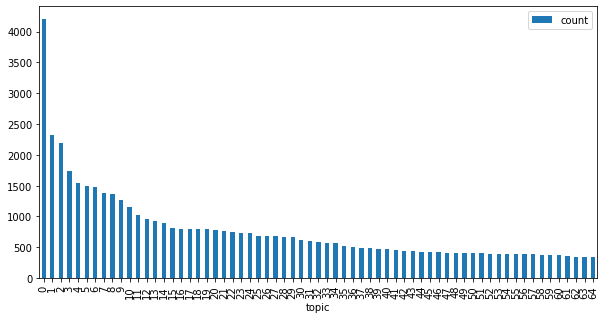

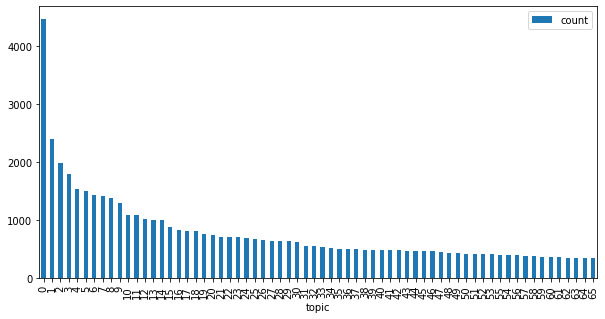

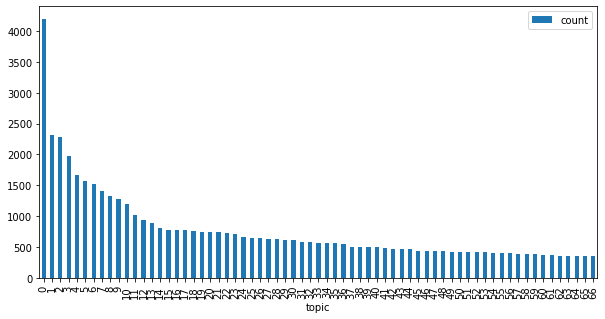

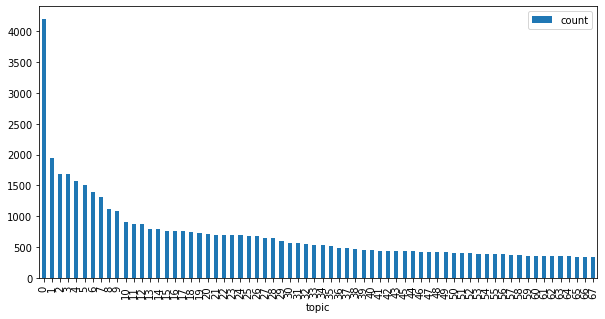

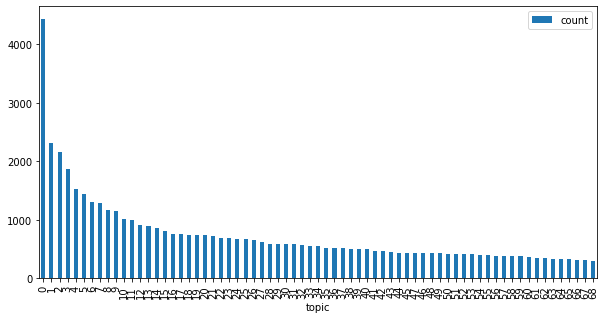

In [ ]:
coherence_list_1 = []

for n_topc in range(60,70,1):
    coh, _ = calculate_coherence(n_topc, input_table=sel_df, model=None)
    coherence_list_1.append((n_topc, coh))

In [ ]:
coherence_list_1

[(60, 0.5625372769750027),
 (61, 0.54751856609747),
 (62, 0.5541555743839315),
 (63, 0.5654809153167347),
 (64, 0.5461704161924812),
 (65, 0.5605192415256958),
 (66, 0.5518737185270641),
 (67, 0.5835736114838538),
 (68, 0.573606371264445),
 (69, 0.5551704615332318)]

#### test: kl divergence

- test

In [ ]:
# reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
# pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html
sel_df = sel_df.reset_index(drop=True)
vectorizer_model = CountVectorizer(stop_words="english",min_df=3)


#parameter need to think about:
#top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
#umap_model = dim_model
topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics=60, calculate_probabilities=False) 
topics, probs = topic_model.fit_transform(sel_df.text[0:300])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

2023-01-06 02:18:09,580 - BERTopic - Transformed documents to Embeddings
2023-01-06 02:18:14,701 - BERTopic - Reduced dimensionality
2023-01-06 02:18:14,724 - BERTopic - Clustered reduced embeddings
2023-01-06 02:18:14,759 - BERTopic - Reduced number of topics from 5 to 5


In [ ]:
topic_model.save("./bert_model/topic_model_allrange_test")

In [ ]:
topic_model = BERTopic.load("./bert_model/topic_model_allrange_test")

In [ ]:
topic_word_matrix = topic_model.c_tf_idf_.toarray()

In [ ]:
topic_word_matrix.shape # (topics, words)

(61, 5524)

In [ ]:
topic_word_matrix

array([[1.87877036e-04, 3.76077154e-04, 1.89641450e-04, ...,
        3.53873263e-05, 5.03826141e-04, 2.13046596e-04],
       [2.73054000e-04, 4.90035051e-04, 2.75618339e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.29810904e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82074567e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.02259765e-03, 0.00000000e+00]])

In [ ]:
# topic -1 is on the first row
# we delete topic -1
topic_word_matrix = np.delete(topic_word_matrix, obj=0, axis=0)

In [ ]:
!pip install octis

In [ ]:
import octis

In [ ]:
from octis.evaluation_metrics.topic_significance_metrics import KL_uniform

In [ ]:
model_output = dict()
model_output['topic-word-matrix'] = topic_word_matrix

In [ ]:
sl_score = KL_uniform().score(model_output, per_topic=True)

In [ ]:
sl_score

In [ ]:
from octis.evaluation_metrics.diversity_metrics import KLDivergence

In [ ]:
kl_score = KLDivergence().score(model_output)

In [ ]:
kl_score

11.642182119066765

- wrap up

In [ ]:
sel_df = pd.read_csv('./allrange_sel_data_fortopicmodeling.csv')

In [ ]:
def calculate_metric(n_topc, metric, input_table=sel_df, model=False):
    # reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
    # pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html
    sel_df = input_table.reset_index(drop=True)
    vectorizer_model = CountVectorizer(stop_words="english",min_df=3)

    if model == False:
        #parameter need to think about:
        #top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
        #umap_model = dim_model
        topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics= n_topc, calculate_probabilities=False) 
        topics, probs = topic_model.fit_transform(sel_df.text)
        topic_model.save("./bert_model/topic_model_allrange"+str(n_topc))
    else:
        topic_model = BERTopic.load("./bert_model/topic_model_allrange"+str(n_topc))
        topics, probs = topic_model.fit_transform(sel_df.text)

    documents = pd.DataFrame({"Document": sel_df.text,
                          "ID": range(len(sel_df.text)),
                          "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

    a = documents.Topic.value_counts().to_frame().reset_index(drop=False)
    a = a.rename(columns={'index':'topic', 'Topic':'count'})
    display(a[a.topic != -1].plot.bar(x='topic', y='count', figsize=(10,5)))

    sel_df_1 = pd.merge(sel_df[['encoded_unique_ticker_ts','rid','predict','num_word']],\
                        documents, left_index=True, right_index=True)
    
    if metric == 'coherence':
    
        # Preprocess documents
        cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)


        # Extract vectorizer and tokenizer from BERTopic
        vectorizer = topic_model.vectorizer_model
        tokenizer = vectorizer.build_tokenizer()
        analyzer = vectorizer.build_analyzer()


        # Extract features for Topic Coherence evaluation
        words = vectorizer.get_feature_names()
        tokens = [analyzer(doc) for doc in cleaned_docs]
        dictionary = corpora.Dictionary(tokens)
        corpus = [dictionary.doc2bow(token) for token in tokens]
        topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
                    for topic in range(len(set(topics))-1)]

        coherence_model = CoherenceModel(topics=topic_words, 
                                    texts=tokens, 
                                    corpus=corpus,
                                    dictionary=dictionary, 
                                    coherence='c_v')
        coherence = coherence_model.get_coherence()

        return coherence, sel_df_1
    
    elif metric == 'kl':
    
        #get word matrix
        topic_word_matrix = topic_model.c_tf_idf_.toarray()
        # topic -1 is on the first row
        # we delete topic -1
        topic_word_matrix = np.delete(topic_word_matrix, obj=0, axis=0)

        #input for KLDivergence()
        model_output = dict()
        model_output['topic-word-matrix'] = topic_word_matrix
        kl_score = KLDivergence().score(model_output)


        return kl_score, sel_df_1

    else:
        print('wrong metric')

In [ ]:
sel_df = sel_df.reset_index(drop=True)
vectorizer_model = CountVectorizer(stop_words="english",min_df=3)

topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, 
                       nr_topics= 30, calculate_probabilities=False) 
#topic_model = BERTopic.load("./bert_model/topic_model_allrange"+str(25))


In [ ]:
sel_df.text.values

array(["You mentioned, Bill, in your prepared remarks something that Sysco was doing that was driving up the cost of delivery in the quarter, maybe -- I don't know if it was a mistake that you made, or maybe there were some initiatives.",
       "Yes, the net loss that was -- I'm sorry, net loss attributable to noncontrolling interests of $2.2 million, does that suggest that EyeLock lost $2.2 million in a quarter.",
       "It's a much different environment than what we are kind of used to.",
       ...,
       "VJ you'd said during the Q&A that some of the R&D investment's going to come from that product.",
       'Just any additional color you can provide there, and what youre seeing on the inflation front would be helpful?',
       'Or could you go beyond that to look at some other technologies that hospitals might be using?'],
      dtype=object)

In [ ]:
topics, probs = topic_model.fit_transform(sel_df.text.values)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
topics

[0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 -1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 0,

In [ ]:
y#select the best n

kl_list = []

for n_topc in range(20,80,5):
    #topic model have been trained, so model = True
    kl, _ = calculate_metric(n_topc, 'kl', input_table=sel_df, model=False)
    kl_list.append((n_topc, kl))

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2023-01-06 02:33:39,921 - BERTopic - Transformed documents to Embeddings
2023-01-06 02:39:54,141 - BERTopic - Reduced dimensionality


BrokenProcessPool: ignored

### find the best n topics

## use all data without package

In [14]:
sel_df = pd.read_csv('./allrange_sel_data_fortopicmodeling.csv')

In [15]:
def calculate_metric(n_topc, input_table=sel_df, model=False):
    # reference: https://colab.research.google.com/drive/1ClTYut039t-LDtlcd-oQAdXWgcsSGTw9?usp=sharing#scrollTo=xG_slPMurnmz
    # pretrained sentence bert use "all-MiniLM-L6-v2" :https://www.sbert.net/docs/pretrained_models.html
    sel_df = input_table.reset_index(drop=True)
    vectorizer_model = CountVectorizer(stop_words="english",min_df=3)

    if model == False:
        #parameter need to think about:
        #top_n_words=5,   nr_topics=20, low_memory=True, calculate_probabilities=True,  n_gram_range=(1,2), min_topic_size=20, 
        #umap_model = dim_model
        topic_model = BERTopic(verbose=True,language="english", vectorizer_model=vectorizer_model, nr_topics= n_topc, calculate_probabilities=False) 
        topics, probs = topic_model.fit_transform(sel_df.text)
        topic_model.save("./bert_model/topic_model_allrange"+str(n_topc))
    else:
        topic_model = BERTopic.load("./bert_model/topic_model_allrange"+str(n_topc))
        topics, probs = topic_model.fit_transform(sel_df.text)

    documents = pd.DataFrame({"Document": sel_df.text,
                          "ID": range(len(sel_df.text)),
                          "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

    a = documents.Topic.value_counts().to_frame().reset_index(drop=False)
    a = a.rename(columns={'index':'topic', 'Topic':'count'})
    display(a[a.topic != -1].plot.bar(x='topic', y='count', figsize=(10,5)))

    sel_df_1 = pd.merge(sel_df[['encoded_unique_ticker_ts','rid','predict','num_word']],\
                        documents, left_index=True, right_index=True)
    

    # calculate cohenrece
    # Preprocess documents
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)


    # Extract vectorizer and tokenizer from BERTopic
    vectorizer = topic_model.vectorizer_model
    tokenizer = vectorizer.build_tokenizer()
    analyzer = vectorizer.build_analyzer()


    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
                for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, 
                                texts=tokens, 
                                corpus=corpus,
                                dictionary=dictionary, 
                                coherence='c_v')
    coherence = coherence_model.get_coherence()


    
  
    # calculate KLDivergence
    #get word matrix
    topic_word_matrix = topic_model.c_tf_idf_.toarray()
    # topic -1 is on the first row
    # we delete topic -1
    topic_word_matrix = np.delete(topic_word_matrix, obj=0, axis=0)

    #input for KLDivergence()
    model_output = dict()
    model_output['topic-word-matrix'] = topic_word_matrix
    kl_score = KLDivergence().score(model_output)


    return coherence, kl_score, sel_df_1


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

2023-01-07 21:46:01,117 - BERTopic - Transformed documents to Embeddings
2023-01-07 21:46:03,753 - BERTopic - Reduced dimensionality
2023-01-07 21:46:03,775 - BERTopic - Clustered reduced embeddings
2023-01-07 21:46:03,824 - BERTopic - Reduced number of topics from 9 to 9


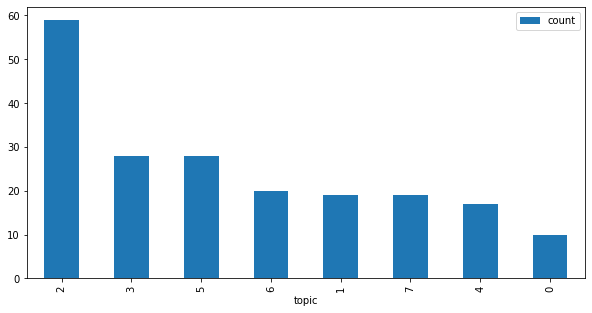

In [24]:
#test
ch, kl, tp_fr = calculate_metric(30, input_table=sel_df.iloc[0:400,:], model=False)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

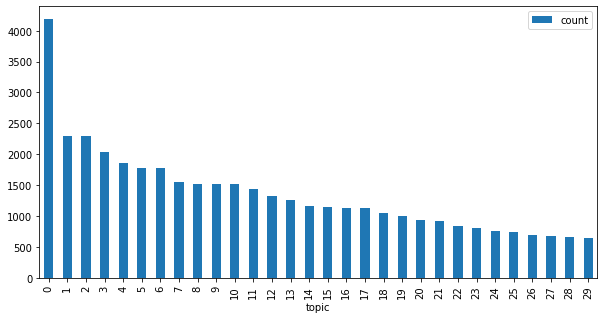

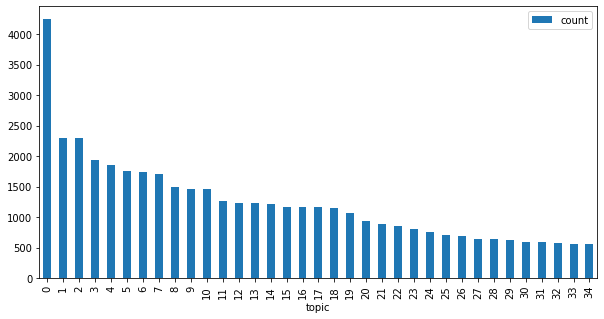

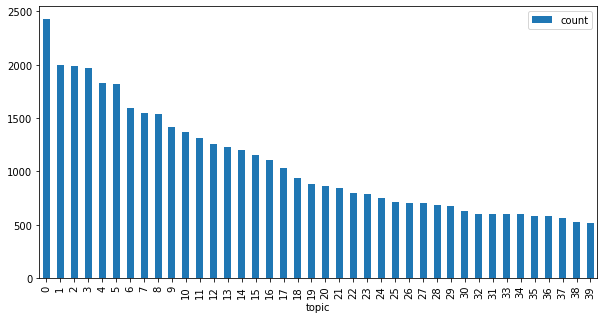

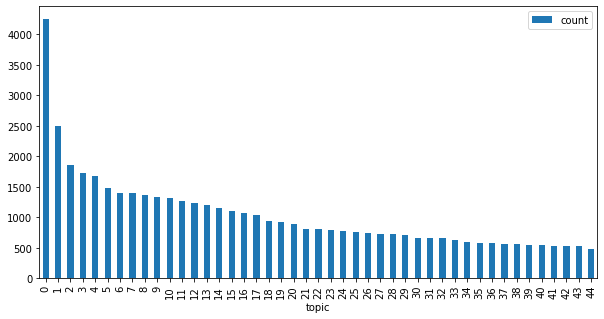

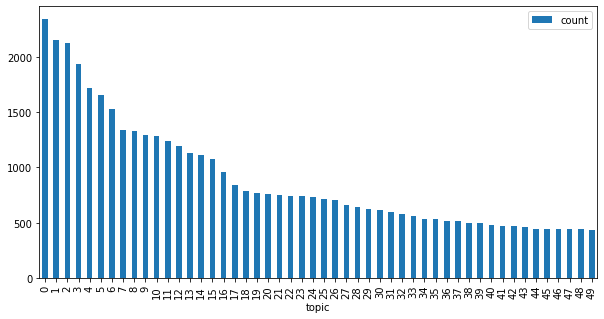

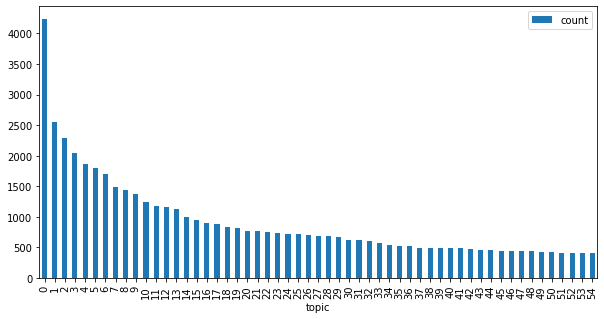

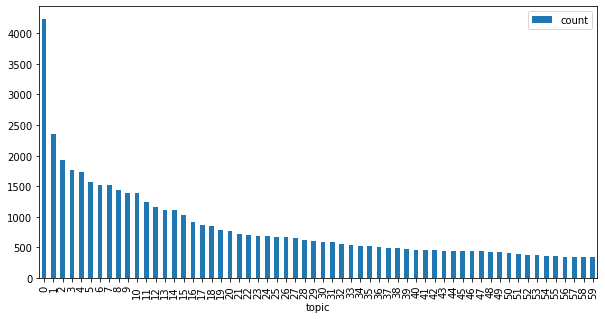

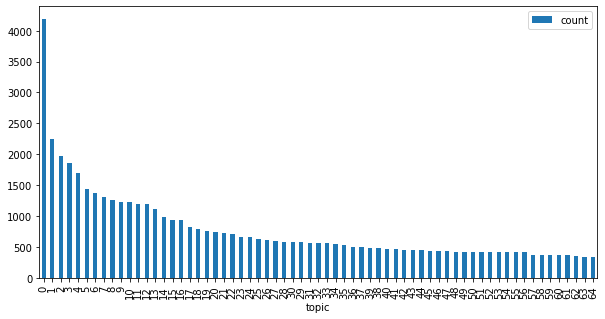

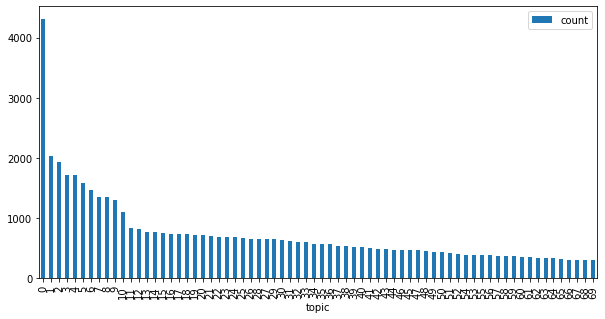

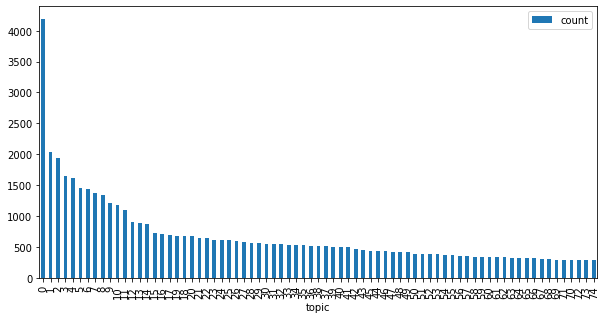

In [16]:
res_list = []

for n_topc in range(30,80,5):
    #topic model have been trained, so model = True
    ch, kl, tp_fr = calculate_metric(n_topc,  input_table=sel_df, model=True)
    res_list.append((n_topc, ch, kl))
    tp_fr.to_csv('./topic_result/topic_table_'+str(n_topc)+'.csv')


In [18]:
print(res_list)

[(30, 0.5157193687316419, 12.810221708029164), (35, 0.5333144411578861, 12.600426718992104), (40, 0.5519771018201862, 12.2750837982896), (45, 0.5288418012725636, 12.322042863747932), (50, 0.555063024319621, 12.318084962168749), (55, 0.5498178449283457, 11.359365226834958), (60, 0.557455097549009, 11.594846252257241), (65, 0.5585764992395215, 11.598243477237753), (70, 0.5656310089115959, 11.379640327717008), (75, 0.5571421965430515, 11.036296836683347)]


In [17]:
import pickle
with open("./topic_result/res_list.pkl", "wb") as fp:   #Pickling
    pickle.dump(res_list, fp)